# Scatter Plots

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [19]:
data = yf.download(['XOM', 'SPY','GS'], '2017-01-01', '2020-01-01')
df = data['Adj Close']
df.head()

[*********************100%***********************]  3 of 3 completed


,GS,SPY,XOM
Date,,,
2017-01-03,225.147308,208.895447,74.296684
2017-01-04,226.601227,210.138245,73.479240
2017-01-05,224.914291,209.971268,72.383888
2017-01-06,228.250916,210.722473,72.343018
2017-01-09,226.377563,210.026917,71.149574


In [20]:
df['DailyReturns_SPY'] = df['SPY'] - df['SPY'].shift(1)
df['DailyReturns_XOM'] = df['XOM'] - df['XOM'].shift(1)
df['DailyReturns_GS'] = df['GS'] - df['GS'].shift(1)
df.head(10)

<ipython-input-20-e440f1b03bb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DailyReturns_SPY'] = df['SPY'] - df['SPY'].shift(1)
<ipython-input-20-e440f1b03bb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DailyReturns_XOM'] = df['XOM'] - df['XOM'].shift(1)
<ipython-input-20-e440f1b03bb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,GS,SPY,XOM,DailyReturns_SPY,DailyReturns_XOM,DailyReturns_GS
Date,,,,,,
2017-01-03,225.147308,208.895447,74.296684,NaN,NaN,NaN
2017-01-04,226.601227,210.138245,73.479240,1.242798,-0.817444,1.453918
2017-01-05,224.914291,209.971268,72.383888,-0.166977,-1.095352,-1.686935
2017-01-06,228.250916,210.722473,72.343018,0.751205,-0.040871,3.336624
2017-01-09,226.377563,210.026917,71.149574,-0.695557,-1.193443,-1.873352
2017-01-10,226.079315,210.026917,70.242203,0.000000,-0.907372,-0.298248
2017-01-11,229.052460,210.620483,70.961555,0.593567,0.719353,2.973145
2017-01-12,227.263000,210.091797,70.577347,-0.528687,-0.384209,-1.789459
2017-01-13,227.691696,210.574127,70.585533,0.482330,0.008186,0.428696


In [21]:
# Dropping the missng values
df.dropna(inplace=True)

<ipython-input-21-13613c05cf70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


<Figure size 1440x720 with 0 Axes>

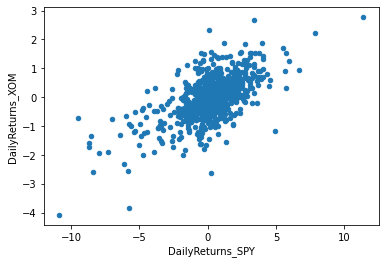

In [22]:
# PLotting
plt.figure(figsize=[20,10])
df.plot(kind='scatter', x = 'DailyReturns_SPY', y = 'DailyReturns_XOM')
plt.show()

# Fitting a line through the scatter plot

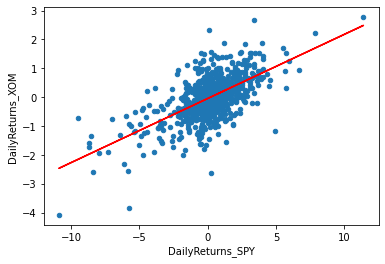

In [12]:
beta_XOM, alpha_XOM = np.polyfit(df['DailyReturns_SPY'], df['DailyReturns_XOM'], 1)

#plotting the line
df.plot(kind='scatter', x='DailyReturns_SPY', y='DailyReturns_XOM')
plt.plot(df['DailyReturns_SPY'], beta_XOM * df['DailyReturns_SPY']+ alpha_XOM, '-', color='r')
plt.show()

# Let's print the numbers for GOLDMAN SACHS

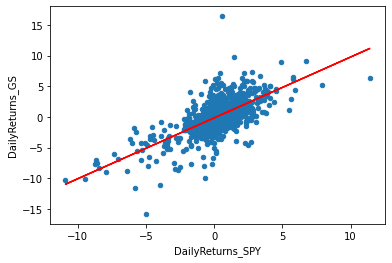

In [25]:
beta_GS, alpha_GS = np.polyfit(df['DailyReturns_SPY'], df['DailyReturns_GS'],1)

df.plot(kind='scatter', x='DailyReturns_SPY', y='DailyReturns_GS')
plt.plot(df['DailyReturns_SPY'], beta_GS*df['DailyReturns_SPY']+alpha_GS, '-', color='r')
plt.show()

In [26]:
#printing values

print(f'beta_XOM : {beta_XOM}')
print(f'beta_GS : {beta_GS}')
print(f'alpha_XOM : {alpha_XOM}')
print(f'alpha_GS: {alpha_GS}')

beta_XOM : 0.2219271166789834
beta_GS : 0.9933328261921587
alpha_XOM : -0.044406079509556225
alpha_GS: -0.14206521167970124


## Inference: Since Beta(GS) > Beta(XOM): We can conclude that GS is more reactive to markets(SPY) than XOM

## Inference2: SInce alpha(XOM) > alpha(GS): We can conclude that XOM performs better than GS

# Double-Check

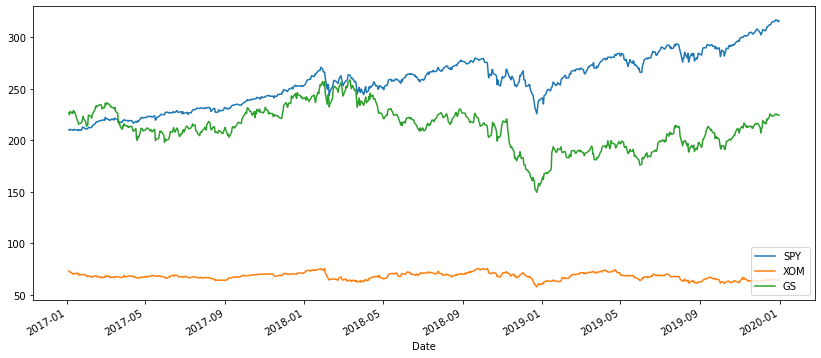

In [35]:
plt.figure(figsize=[14,6])
df['SPY'].plot()
df['XOM'].plot()
df['GS'].plot()
plt.legend(loc=4)
plt.show()
